This file contains
1. LightGBM
2. XGBoost
3. Visualizations and Explainiblity - LIME
4. Trying out deep learning models

LightGBM and its Evaluation and Visualization

In [16]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay
)

In [17]:
lgb_model = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,  
    max_depth=10, 
    num_leaves=50,  
    random_state=42,
    class_weight="balanced"  
)

lgb_model.fit(X_train_reduced, y_train)

y_pred = lgb_model.predict(X_val_reduced)
y_pred_proba = lgb_model.predict_proba(X_val_reduced)[:, 1]  

[LightGBM] [Info] Number of positive: 29067, number of negative: 176993
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.321672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 57957
[LightGBM] [Info] Number of data points in the train set: 206060, number of used features: 282
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


In [18]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred_proba)

# Print Metrics
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print(f"✅ AUC-ROC: {auc:.4f}")

# Detailed Classification Report
print("\n📌 Classification Report:\n", classification_report(y_val, y_pred))

✅ Accuracy: 0.8747
✅ Precision: 0.5431
✅ Recall: 0.7063
✅ F1 Score: 0.6140
✅ AUC-ROC: 0.8917

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93     44249
           1       0.54      0.71      0.61      7267

    accuracy                           0.87     51516
   macro avg       0.75      0.80      0.77     51516
weighted avg       0.89      0.87      0.88     51516



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


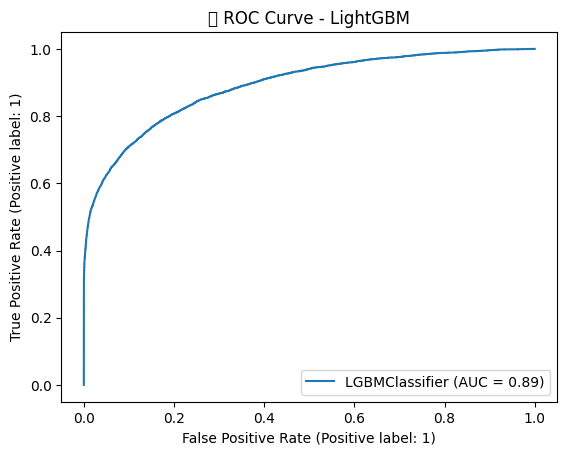

In [19]:
RocCurveDisplay.from_estimator(lgb_model, X_val_reduced, y_val)
plt.title("🚀 ROC Curve - LightGBM")
plt.show()

Feature Importance

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


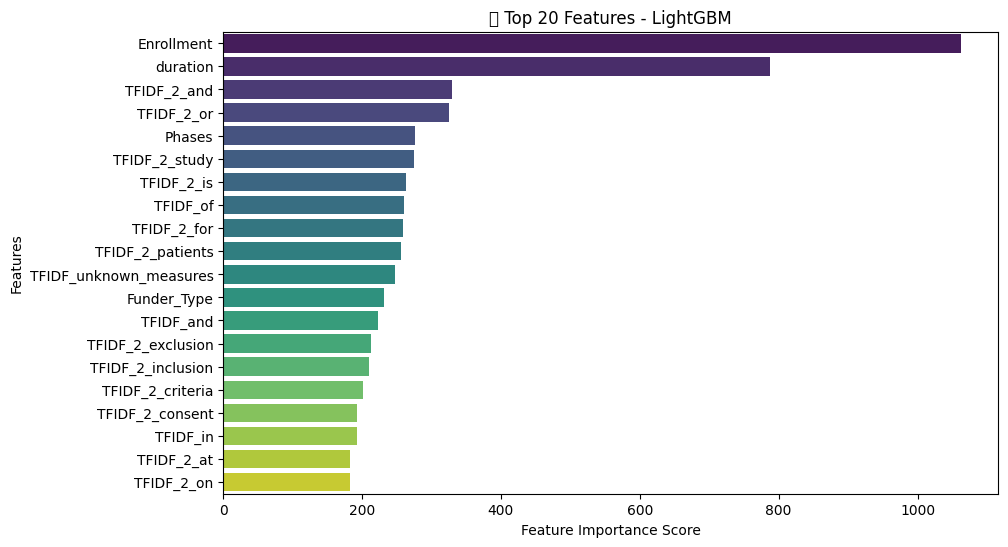

In [20]:
feature_importance_df = pd.DataFrame({
    'Feature': X_train_reduced.columns,
    'Importance': lgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df.head(20), palette="viridis")
plt.title("🔥 Top 20 Features - LightGBM")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

Generating LIME Explanation

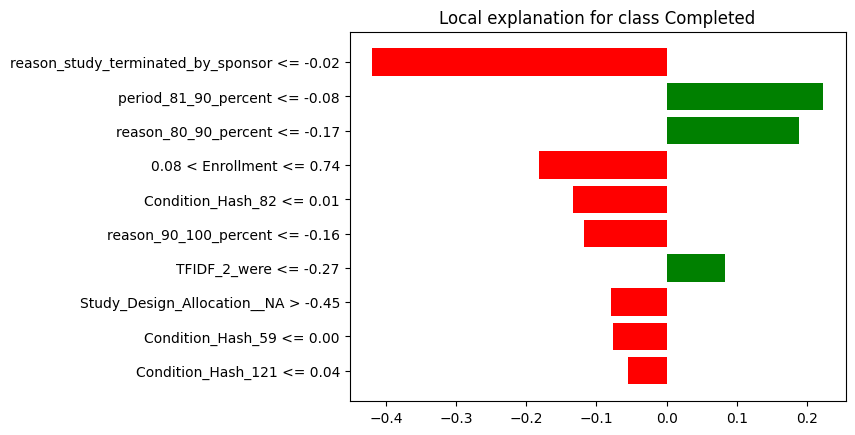

In [22]:
import lime
import lime.lime_tabular

lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_reduced.values,
    mode="classification",
    feature_names=X_train_reduced.columns,
    class_names=["Not Completed", "Completed"],
    discretize_continuous=True
)

random_index = np.random.randint(0, X_val_reduced.shape[0])
sample_instance = X_val_reduced.iloc[random_index]

lime_exp_lgb = lime_explainer.explain_instance(
    data_row=sample_instance.values,
    predict_fn=lgb_model.predict_proba
)

lime_exp_lgb.show_in_notebook()
lime_exp_lgb.as_pyplot_figure()
plt.show()

In [23]:
pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 35.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 73.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 7.4 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 74.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.5/254.5 kB 14.2 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.2-py3-none-any.whl size=4010716 sha256=cbe02dbb057

XGBoost Initial Model with Evaluation and Visualization

In [26]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay
)
import lime
import lime.lime_tabular

In [27]:
xgb_model = xgb.XGBClassifier(
    n_estimators=500,  
    learning_rate=0.05,  
    max_depth=10,  
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight= y_train.value_counts()[0] / y_train.value_counts()[1]  # Handle class imbalance
)

xgb_model.fit(X_train_reduced, y_train)

y_pred = xgb_model.predict(X_val_reduced)
y_pred_proba = xgb_model.predict_proba(X_val_reduced)[:, 1]  # Probability for class 1

In [28]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred_proba)

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print(f"✅ AUC-ROC: {auc:.4f}")

print("\n📌 Classification Report:\n", classification_report(y_val, y_pred))

✅ Accuracy: 0.9005
✅ Precision: 0.6499
✅ Recall: 0.6382
✅ F1 Score: 0.6440
✅ AUC-ROC: 0.8902

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     44249
           1       0.65      0.64      0.64      7267

    accuracy                           0.90     51516
   macro avg       0.80      0.79      0.79     51516
weighted avg       0.90      0.90      0.90     51516



Feature Importance Plot


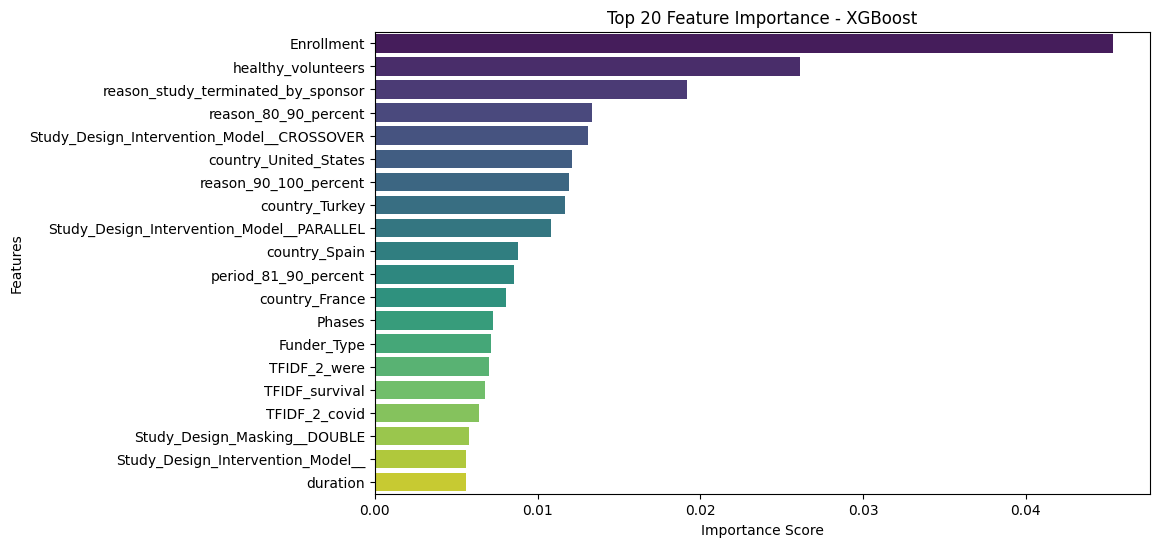

In [30]:
feature_importance_df = pd.DataFrame({
    'feature': X_train_reduced.columns,
    'importance': xgb_model.feature_importances_
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df["importance"][:20], y=feature_importance_df["feature"][:20], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 20 Feature Importance - XGBoost")
plt.show()

Generating LIME Explainer


In [31]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_reduced.values,  
    feature_names=X_train_reduced.columns.tolist(),
    class_names=["Not Completed", "Completed"],  
    mode="classification"
)

idx = np.random.randint(0, X_val_reduced.shape[0])
lime_exp = explainer.explain_instance(X_val_reduced.iloc[idx].values, xgb_model.predict_proba)

lime_exp.show_in_notebook()

Computing Permutation Importance


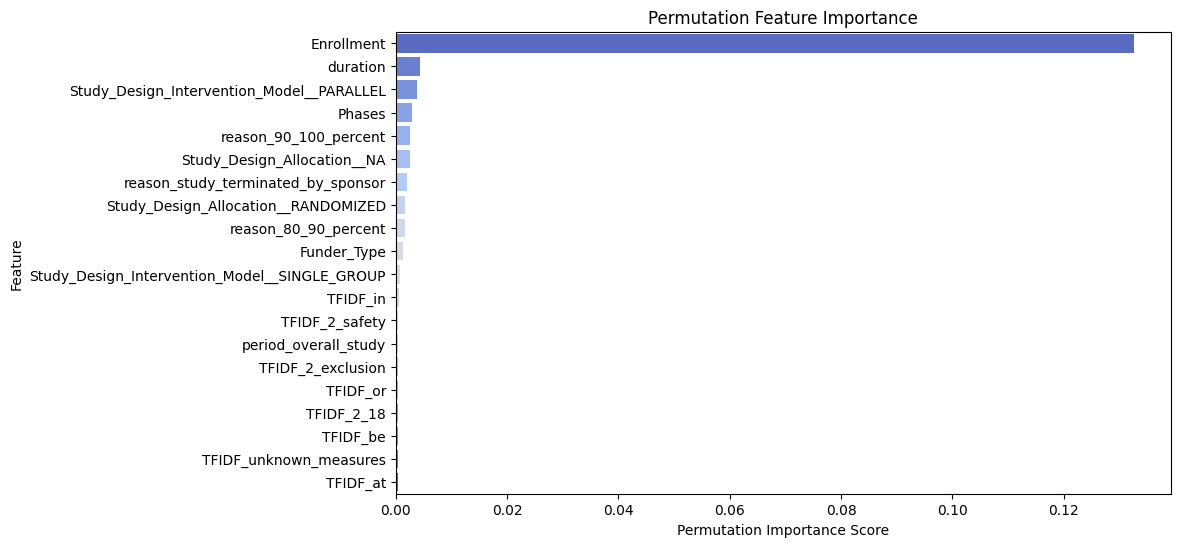

In [32]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(xgb_model, X_val_reduced, y_val, n_repeats=5, random_state=42, n_jobs=-1)

perm_importance_df = pd.DataFrame({
    "feature": X_train_reduced.columns,
    "importance": perm_importance.importances_mean
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=perm_importance_df["importance"][:20], y=perm_importance_df["feature"][:20], palette="coolwarm")
plt.xlabel("Permutation Importance Score")
plt.ylabel("Feature")
plt.title("Permutation Feature Importance")
plt.show()

Partial Dependence Display For XGBoost

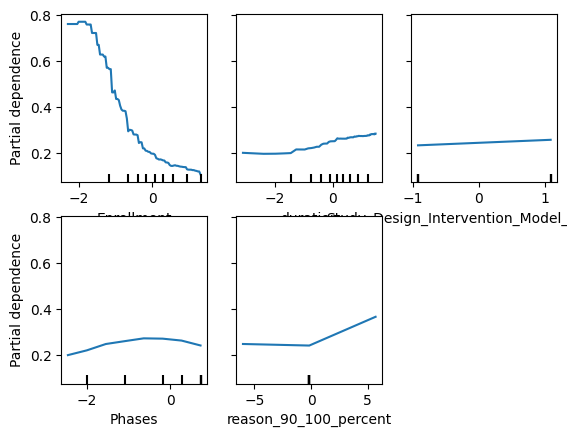

In [33]:
from sklearn.inspection import PartialDependenceDisplay

features_to_plot = perm_importance_df["feature"][:5].tolist()

pdp_display = PartialDependenceDisplay.from_estimator(xgb_model, X_val_reduced, features_to_plot)
plt.show()

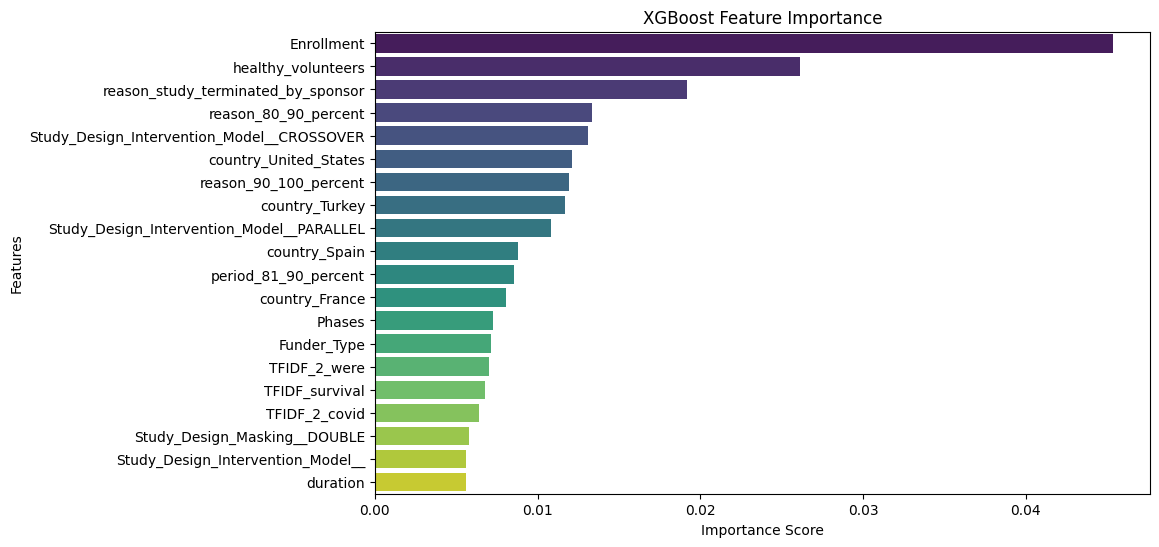

In [34]:
feature_importance_df = pd.DataFrame({
    'feature': X_train_reduced.columns,
    'importance': xgb_model.feature_importances_
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df["importance"][:20], y=feature_importance_df["feature"][:20], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()

Trying out Deep learning models

MLP trial

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Epoch 1/20
6440/6440 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.8582 - loss: 0.4222 - val_accuracy: 0.8589 - val_loss: 0.4072
Epoch 2/20
6440/6440 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - accuracy: 0.8586 - loss: 0.4090 - val_accuracy: 0.8589 - val_loss: 0.4074
Epoch 3/20
6440/6440 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - accuracy: 0.8586 - loss: 0.4080 - val_accuracy: 0.8589 - val_loss: 0.4070
Epoch 4/20
6440/6440 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.8586 - loss: 0.4079 - val_accuracy: 0.8589 - val_loss: 0.4070
Epoch 5/20
6440/6440 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.8586 - loss: 0.4081 - val_accuracy: 0.8589 - val_loss: 0.4070
Epoch 6/20
6440/6440 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.8586 - loss: 0.4079 - val_accuracy: 0.8589 - val_loss: 0.4070
Epoch 7/20
6440/6440 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.8586 - loss: 0.4085 - val_accuracy: 0.8589 - val_loss: 0.4069
Epoch 8/20
6440/6440 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.8586 - loss: 0

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


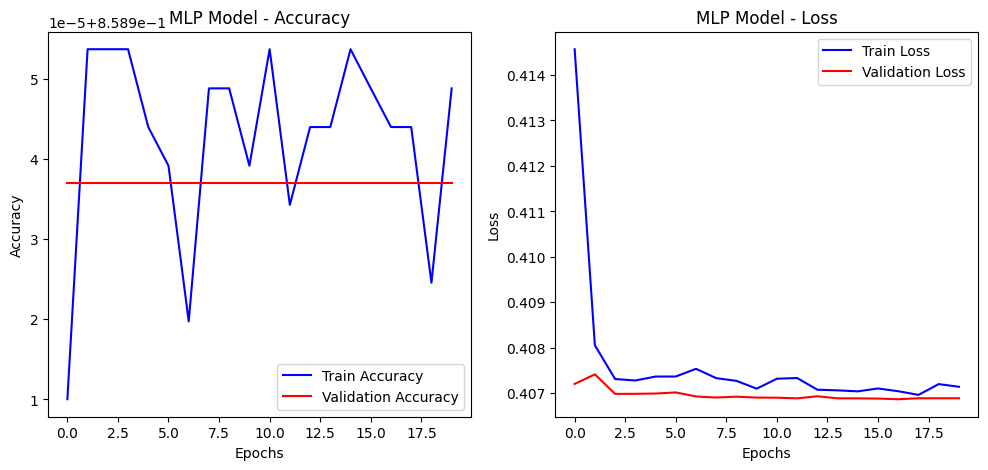

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

mlp_model = Sequential([
    Dense(512, activation="relu", input_shape=(X_train_reduced.shape[1],)),
    Dropout(0.3),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")  
])

mlp_model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss="binary_crossentropy", 
                  metrics=["accuracy"])

history = mlp_model.fit(
    X_train_reduced, y_train, 
    validation_data=(X_val_reduced, y_val),
    epochs=20, 
    batch_size=32,
    verbose=1
)

y_pred_mlp = (mlp_model.predict(X_val_reduced) > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(y_val, y_pred_mlp))

auc_score = roc_auc_score(y_val, y_pred_mlp)
print(f"AUC-ROC Score: {auc_score:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("MLP Model - Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("MLP Model - Loss")
plt.legend()

plt.show()

In [68]:
if isinstance(y_train, pd.Series):
    y_train = y_train.to_numpy()
if isinstance(y_val, pd.Series):
    y_val = y_val.to_numpy()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_val_scaled = scaler.transform(X_val_reduced)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False)


In [69]:
print(type(y_train), type(y_val))


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


TRIAL 2 - MLP - a bit tuning and class weights

In [73]:
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)

In [74]:
class MLPModel(nn.Module):
    def __init__(self, input_dim):  
        super(MLPModel, self).__init__()  
        self.fc1 = nn.Linear(input_dim, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(0.3)

        self.fc4 = nn.Linear(128, 2)  
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)
        
        x = self.fc4(x)  
        return x



In [75]:
mlp_model = MLPModel(input_dim=X_train_reduced.shape[1])
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.AdamW(mlp_model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

In [76]:
num_epochs = 50
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mlp_model.to(device)
criterion.to(device)

for epoch in range(num_epochs):
    mlp_model.train()
    total_loss = 0.0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = mlp_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    scheduler.step()  
    avg_loss = total_loss / len(train_loader)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

Epoch 1/50, Loss: 0.6993
Epoch 2/50, Loss: 0.6948
Epoch 3/50, Loss: 0.6936
Epoch 4/50, Loss: 0.6925
Epoch 5/50, Loss: 0.6908
Epoch 6/50, Loss: 0.6880
Epoch 7/50, Loss: 0.6832
Epoch 8/50, Loss: 0.6757
Epoch 9/50, Loss: 0.6649
Epoch 10/50, Loss: 0.6527
Epoch 11/50, Loss: 0.6265
Epoch 12/50, Loss: 0.6124
Epoch 13/50, Loss: 0.5987
Epoch 14/50, Loss: 0.5893
Epoch 15/50, Loss: 0.5807
Epoch 16/50, Loss: 0.5721
Epoch 17/50, Loss: 0.5639
Epoch 18/50, Loss: 0.5582
Epoch 19/50, Loss: 0.5510
Epoch 20/50, Loss: 0.5448
Epoch 21/50, Loss: 0.5260
Epoch 22/50, Loss: 0.5186
Epoch 23/50, Loss: 0.5150
Epoch 24/50, Loss: 0.5108
Epoch 25/50, Loss: 0.5065
Epoch 26/50, Loss: 0.5011
Epoch 27/50, Loss: 0.4991
Epoch 28/50, Loss: 0.4935
Epoch 29/50, Loss: 0.4924
Epoch 30/50, Loss: 0.4889
Epoch 31/50, Loss: 0.4797
Epoch 32/50, Loss: 0.4765
Epoch 33/50, Loss: 0.4739
Epoch 34/50, Loss: 0.4735
Epoch 35/50, Loss: 0.4707
Epoch 36/50, Loss: 0.4678
Epoch 37/50, Loss: 0.4637
Epoch 38/50, Loss: 0.4637
Epoch 39/50, Loss: 0.

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

mlp_model.eval()

y_pred_logits = mlp_model(X_val_tensor.to(device))
y_pred_proba = torch.softmax(y_pred_logits, dim=1)[:, 1].cpu().detach().numpy()
y_pred = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

print("\n🎯 *MLP Performance on Validation Set*")
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")
print(f"🔹 ROC-AUC: {roc_auc:.4f}")


🎯 *MLP Performance on Validation Set*
🔹 Accuracy: 0.6701
🔹 Precision: 0.1452
🔹 Recall: 0.2740
🔹 F1 Score: 0.1898
🔹 ROC-AUC: 0.5025


TABNET - TRIAL 1

In [80]:
!pip install pytorch-tabnet torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.2 MB/s eta 0:00:00


In [83]:
import numpy as np
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_val_scaled = scaler.transform(X_val_reduced)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

In [ ]:
tabnet_model = TabNetClassifier(
    n_d=64,  
    n_a=64,  
    n_steps=5,  
    gamma=1.3,  
    lambda_sparse=1e-3,  
    optimizer_fn=torch.optim.AdamW, 
    optimizer_params=dict(lr=2e-3, weight_decay=1e-4),  
    scheduler_params={"step_size":10, "gamma":0.9}, 
    scheduler_fn=torch.optim.lr_scheduler.StepLR, 
    mask_type="entmax",  
    verbose=1
)

tabnet_model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_val_scaled, y_val)],
    max_epochs=50,
    patience=10,  
    batch_size=256,
    virtual_batch_size=64,
    num_workers=0,
    weights=1,  
    drop_last=False
)

print("\n✅ TabNet Model Training Complete")

Device used : cpu


epoch 0  | loss: 0.84527 | val_0_auc: 0.49116 |  0:02:16s
epoch 1  | loss: 0.6982  | val_0_auc: 0.51194 |  0:04:27s
epoch 2  | loss: 0.69642 | val_0_auc: 0.48015 |  0:06:38s
epoch 3  | loss: 0.69624 | val_0_auc: 0.50462 |  0:08:49s
epoch 4  | loss: 0.69569 | val_0_auc: 0.45506 |  0:11:00s
epoch 5  | loss: 0.69582 | val_0_auc: 0.48535 |  0:13:11s
epoch 6  | loss: 0.69546 | val_0_auc: 0.51768 |  0:15:22s
epoch 7  | loss: 0.69529 | val_0_auc: 0.49527 |  0:17:32s
epoch 8  | loss: 0.69516 | val_0_auc: 0.51572 |  0:19:41s
epoch 9  | loss: 0.69476 | val_0_auc: 0.52392 |  0:21:49s
epoch 10 | loss: 0.69471 | val_0_auc: 0.52114 |  0:23:58s
epoch 11 | loss: 0.69457 | val_0_auc: 0.49836 |  0:26:07s
epoch 12 | loss: 0.69455 | val_0_auc: 0.5097  |  0:28:21s
epoch 13 | loss: 0.69443 | val_0_auc: 0.50111 |  0:30:35s
epoch 14 | loss: 0.69437 | val_0_auc: 0.50258 |  0:32:46s
epoch 15 | loss: 0.69422 | val_0_auc: 0.49747 |  0:34:55s
epoch 16 | loss: 0.6942  | val_0_auc: 0.49448 |  0:37:04s
epoch 17 | los

Best weights from best epoch are automatically used!


TRYING BERT - Clinical BERT model

In [2]:
import pandas as pd
sidd=pd.read_csv(r"/kaggle/input/sidd-dataset/sidd.csv")

In [3]:
pip install transformers torch scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [5]:
from transformers import BertTokenizer, BertModel
import torch
import pandas as pd
import numpy as np

tokenizer = BertTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = BertModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

model.eval()

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(28996, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
def get_bert_embedding(text):
    """Converts text into BERT embeddings."""
    if not isinstance(text, str) or text.strip() == "":
        return np.zeros(768)  
    
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

In [ ]:
sidd["bert_summary"] = sidd["Brief Summary"].fillna("").apply(get_bert_embedding)
sidd["bert_title"] = sidd["Study Title"].fillna("").apply(get_bert_embedding)
sidd["bert_criteria"] = sidd["criteria"].fillna("").apply(get_bert_embedding)
sidd["bert_population"] = sidd["population"].fillna("").apply(get_bert_embedding)
sidd["bert_primary_outcome"] = sidd["Primary Outcome Measures"].fillna("").apply(get_bert_embedding)
sidd["bert_secondary_outcome"] = sidd["Secondary Outcome Measures"].fillna("").apply(get_bert_embedding)